<h1> CSMODEL Project 1 </h1>
<h2> Group 23</h2>
Members:
Lima, Alfonso Gabriel V.
Olalia, Pamela Kirsten G.
Ortega, Azriel Matthew


## Netflix Original Films & IMDb Scores
The dataset of the notebook is called *Netflix Original Films & IMDB Scores*. It contains all of Netflix's produced films as of June 1, 2021. It contains basic information regarding each film such as the title, genre, language, runtime, and IMDb Score. 

The data in this dataset was acquired via webscraping of a [Wikipedia page](https://en.wikipedia.org/wiki/Lists_of_Netflix_original_films) by Nakul Lakhotia about Netflix's produced films over the years. The data was then integrated with its corresponding IMDb score manually by the owner of the dataset. The IMDb scores were aquired in their official website: [imdb.com](https://www.imdb.com/), which is the premiere website for movie reviews and critique.



## pandas, matplotlib and chardet
**pandas** is a software library for Python that is designed for data manipulation and data analysis. **matplotlib** is a software libary for data visualization, which allows us to easily render various types of graphs. We will be using these two libraries in this Notebook. **chardet** is a software library for Python that serves as the Universal Character Encoding Detector.

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import chardet
import scipy.stats

## Reading the dataset

In [75]:
with open('NetflixOriginals.csv', 'rb') as f:
    result = chardet.detect(f.read())  # or readline if the file is large

In [76]:
netflix_df = pd.read_csv('NetflixOriginals.csv', encoding=result['encoding'])

## Structure of the Dataset

In [77]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       584 non-null    object 
 1   Genre       584 non-null    object 
 2   Premiere    584 non-null    object 
 3   Runtime     584 non-null    int64  
 4   IMDB Score  584 non-null    float64
 5   Language    584 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 27.5+ KB


There are a total of 584 observations in the dataset. Each observation contains 6 variables to describe each observation. These are the records and details for every film by Netflix

In [78]:
netflix_df.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi


## Variables in the Dataset

The following are detailed descriptions of each column in the dataset: <br>
> 1. ***`Title`*** - The name of the film. This is the unique value of each observation in the dataset <br>
2. ***`Genre`*** - The type of film based on its narrative elements. This describes what kind of plot the film portrays. Some observations may have a mix of 2 or more genres. <br>
3. ***`Premiere`*** - The date when the film was released to the public.<br>
4. ***`Runtime`*** - The overall length of the film in minutes.<br>
5. ***`IMDB Score`*** - The score of the film on the IMDB website. The scores are taken from members of the IMDB community.
6. ***`Language`*** - The languages used in the film. Some films may have a mix of 2 or more languages

## Data Cleaning

#### Missing Values
The following code returns the number of null values which represents a missing value for each variable in the dataset.

In [79]:
netflix_df.isnull().sum()

Title         0
Genre         0
Premiere      0
Runtime       0
IMDB Score    0
Language      0
dtype: int64

As seen above, there are no observations that contains a null value in any variable.

#### Data Type
The following code returns the data type of each variable in the dataset.

In [80]:
netflix_df.dtypes

Title          object
Genre          object
Premiere       object
Runtime         int64
IMDB Score    float64
Language       object
dtype: object

Almost all of the variables have the appropriate data type for their values except for the *Premiere*. Since the *Premiere* column contains the date of the premiere of the film, the appropriate data type for this is the **Datetime** data type not an object/string.

The following code will convert the data type to **Datetime**.

In [81]:
netflix_df["Premiere"] = pd.to_datetime(netflix_df['Premiere'])
netflix_df.dtypes

Title                 object
Genre                 object
Premiere      datetime64[ns]
Runtime                int64
IMDB Score           float64
Language              object
dtype: object

Now all of the variables in the dataset have the appropriate data type for their values.

#### Duplicate  Values
The values under the *Title* column are the only distinct values for each observation. This is because this is the only attribute that does not describe the observation but names it. So, to check if there are any duplicate values in the dataset, we must count how many unique values are under the *Title* column. If they are equal to the number of observations, then there are no duplicate observations.


In [82]:
netflix_df['Title'].nunique()

584

The code above returns the number of unique values under the *Title* column. It is equal to the number of observations, therefore, there are **no duplicate values in the dataset**

#### Data Format
Now we want to check if the data under the different columns are consistent with each other. The following blocks of code will display this.

In [83]:
netflix_df['Title'].unique()


array(['Enter the Anime', 'Dark Forces', 'The App', 'The Open House',
       'Kaali Khuhi', 'Drive', 'Leyla Everlasting',
       'The Last Days of American Crime', 'Paradox', 'Sardar Ka Grandson',
       'Searching for Sheela', 'The Call', 'Whipped',
       'All Because of You', 'Mercy', 'After the Raid', 'Ghost Stories',
       'The Last Thing He Wanted', 'What Happened to Mr. Cha?',
       'Death Note', "Hello Privilege. It's Me, Chelsea",
       'Secret Obsession', 'Sextuplets', 'The Girl on the Train',
       'Thunder Force', 'Fatal Affair', 'Just Say Yes',
       'Seriously Single', 'The Misadventures of Hedi and Cokeman',
       '5 Star Christmas', 'After Maria',
       'I Am the Pretty Thing That Lives in the House', 'Paris Is Us',
       'Porta dos Fundos: The First Temptation of Christ', 'Rattlesnake',
       'The Players', 'We Are One', 'Finding Agnes', 'IO', 'Sentinelle',
       'Sol Levante', 'The Binding', 'We Can Be Heroes',
       'Christmas Crossfire', 'Coin Heist', 'Mr

In [84]:
netflix_df['Genre'].unique()


array(['Documentary', 'Thriller', 'Science fiction/Drama',
       'Horror thriller', 'Mystery', 'Action', 'Comedy',
       'Heist film/Thriller', 'Musical/Western/Fantasy', 'Drama',
       'Romantic comedy', 'Action comedy', 'Horror anthology',
       'Political thriller', 'Superhero-Comedy', 'Horror',
       'Romance drama', 'Anime / Short', 'Superhero', 'Heist', 'Western',
       'Animation/Superhero', 'Family film', 'Action-thriller',
       'Teen comedy-drama', 'Romantic drama', 'Animation',
       'Aftershow / Interview', 'Christmas musical',
       'Science fiction adventure', 'Science fiction', 'Variety show',
       'Comedy-drama', 'Comedy/Fantasy/Family', 'Supernatural drama',
       'Action/Comedy', 'Action/Science fiction',
       'Romantic teenage drama', 'Comedy / Musical', 'Musical',
       'Science fiction/Mystery', 'Crime drama',
       'Psychological thriller drama', 'Adventure/Comedy', 'Black comedy',
       'Romance', 'Horror comedy', 'Christian musical',
       'Rom

For the *Genre* column, we can see that some multi-genre values are inconsistent with each other. Some have spaces before and after the "/" while others do not. This might cause difficulty later on in finding values so we want to change this to be having no space at all. <br> <br>
The following code will do that:


In [85]:
netflix_df["Genre"] = netflix_df["Genre"].str.replace(" / ","/")
netflix_df["Genre"].unique()

array(['Documentary', 'Thriller', 'Science fiction/Drama',
       'Horror thriller', 'Mystery', 'Action', 'Comedy',
       'Heist film/Thriller', 'Musical/Western/Fantasy', 'Drama',
       'Romantic comedy', 'Action comedy', 'Horror anthology',
       'Political thriller', 'Superhero-Comedy', 'Horror',
       'Romance drama', 'Anime/Short', 'Superhero', 'Heist', 'Western',
       'Animation/Superhero', 'Family film', 'Action-thriller',
       'Teen comedy-drama', 'Romantic drama', 'Animation',
       'Aftershow/Interview', 'Christmas musical',
       'Science fiction adventure', 'Science fiction', 'Variety show',
       'Comedy-drama', 'Comedy/Fantasy/Family', 'Supernatural drama',
       'Action/Comedy', 'Action/Science fiction',
       'Romantic teenage drama', 'Comedy/Musical', 'Musical',
       'Science fiction/Mystery', 'Crime drama',
       'Psychological thriller drama', 'Adventure/Comedy', 'Black comedy',
       'Romance', 'Horror comedy', 'Christian musical',
       'Romantic 

Another problem with the *Genre* column is that it has multiple representations of the same data, For example "Black comedy", "Satire" are both sub-genre of the Comedy Genre. We can just include them to be together. The following code will do that:

In [134]:
for i in range(len(netflix_df["Genre"])):
    if "comedy" in netflix_df["Genre"][i] or "-Comedy" in netflix_df["Genre"][i] or "Satire" in netflix_df["Genre"][i]:
        netflix_df["Genre"] = netflix_df["Genre"].replace({netflix_df["Genre"][i]: "Comedy"})
    if "drama" in netflix_df["Genre"][i]:
        netflix_df["Genre"] = netflix_df["Genre"].replace({netflix_df["Genre"][i]: "Drama"})
    if "thriller" in netflix_df["Genre"][i]:
        netflix_df["Genre"] = netflix_df["Genre"].replace({netflix_df["Genre"][i]: "Thriller"})
    if "horror" in netflix_df["Genre"][i] or "Horror anthology" in netflix_df["Genre"][i]:
        netflix_df["Genre"] = netflix_df["Genre"].replace({netflix_df["Genre"][i]: "Horror"})
    if "adventure" in netflix_df["Genre"][i]:
        netflix_df["Genre"] = netflix_df["Genre"].replace({netflix_df["Genre"][i]: "Adventure"})
    if "musical" in netflix_df["Genre"][i]:
        netflix_df["Genre"] = netflix_df["Genre"].replace({netflix_df["Genre"][i]: "Musical"})
    if "Family film" in netflix_df["Genre"][i]:
        netflix_df["Genre"] = netflix_df["Genre"].replace({netflix_df["Genre"][i]: "Family"})
    if "romance" in netflix_df["Genre"][i]:
        netflix_df["Genre"] = netflix_df["Genre"].replace({netflix_df["Genre"][i]: "Romance"})
    if "fantasy" in netflix_df["Genre"][i]:
        netflix_df["Genre"] = netflix_df["Genre"].replace({netflix_df["Genre"][i]: "Fantasy"})
    if "mystery" in netflix_df["Genre"][i]:
        netflix_df["Genre"] = netflix_df["Genre"].replace({netflix_df["Genre"][i]: "Mystery"})
    if "war" in netflix_df["Genre"][i]:
        netflix_df["Genre"] = netflix_df["Genre"].replace({netflix_df["Genre"][i]: "Action"})
    if "War" in netflix_df["Genre"][i]:
        netflix_df["Genre"] = netflix_df["Genre"].replace({netflix_df["Genre"][i]: "Action"})
    if "Action" in netflix_df["Genre"][i]:
        netflix_df["Genre"] = netflix_df["Genre"].replace({netflix_df["Genre"][i]: "Action"})
netflix_df["Genre"].unique()

array(['Documentary', 'Thriller', 'Science fiction/Drama', 'Mystery',
       'Action', 'Comedy', 'Heist film/Thriller',
       'Musical/Western/Fantasy', 'Drama', 'Horror', 'Anime/Short',
       'Superhero', 'Heist', 'Western', 'Animation/Superhero', 'Family',
       'Animation', 'Aftershow/Interview', 'Musical', 'Adventure',
       'Science fiction', 'Variety show', 'Comedy/Fantasy/Family',
       'Comedy/Musical', 'Science fiction/Mystery', 'Adventure/Comedy',
       'Romance', 'Biopic', 'Science fiction/Thriller', 'Mockumentary',
       'One-man show', 'Comedy/Horror', 'Fantasy', 'Zombie/Heist',
       'Sports film', 'Stop Motion', 'Drama/Horror', 'Concert Film',
       'Animation/Musical/Adventure', 'Animation/Musicial',
       'Animation/Comedy/Adventure', 'Anime/Science fiction',
       'Animation/Short', 'Drama/Short', 'Anime/Fantasy', 'Variety Show',
       'Biographical/Comedy', 'Historical-epic', 'Animation/Comedy',
       'Christmas/Fantasy/Adventure/Comedy', 'Mentalism spec

In [87]:
netflix_df["Premiere"].unique()

array(['2019-08-05T00:00:00.000000000', '2020-08-21T00:00:00.000000000',
       '2019-12-26T00:00:00.000000000', '2018-01-19T00:00:00.000000000',
       '2020-10-30T00:00:00.000000000', '2019-11-01T00:00:00.000000000',
       '2020-12-04T00:00:00.000000000', '2020-06-05T00:00:00.000000000',
       '2018-03-23T00:00:00.000000000', '2021-05-18T00:00:00.000000000',
       '2021-04-22T00:00:00.000000000', '2020-11-27T00:00:00.000000000',
       '2020-09-18T00:00:00.000000000', '2020-10-01T00:00:00.000000000',
       '2016-11-22T00:00:00.000000000', '2019-12-19T00:00:00.000000000',
       '2020-01-01T00:00:00.000000000', '2020-02-21T00:00:00.000000000',
       '2021-01-01T00:00:00.000000000', '2017-08-25T00:00:00.000000000',
       '2019-09-13T00:00:00.000000000', '2019-07-18T00:00:00.000000000',
       '2019-08-16T00:00:00.000000000', '2021-02-26T00:00:00.000000000',
       '2021-04-09T00:00:00.000000000', '2020-07-16T00:00:00.000000000',
       '2021-04-02T00:00:00.000000000', '2020-07-31

In [88]:
netflix_df["Runtime"].unique()

array([ 58,  81,  79,  94,  90, 147, 112, 149,  73, 139,  97, 101,  25,
       144, 115, 102, 100,  64,  99, 120, 105,  89, 107,  95,  37,  83,
        46,  85,  88,  86,  80,   4,  93, 106, 103, 119,  96, 113, 104,
        10,  98, 117,  70, 131,  87,  60, 116,  92, 121,  78, 114,  56,
        21,  63, 126, 142, 108, 125,  91,  49, 118,  34, 124,  52, 111,
        75, 148,  32,  23,  53, 132, 123, 122, 128,  82,  84,  42, 151,
        72,  30, 129,  44, 134, 109,  16,  41,  28,  74,   9, 155,  55,
        40,  17, 136, 130,  19,  54,  76,  39,   7,  57,  14,  31,  48,
        27,  45,  36,  47, 110, 138, 133, 140,  13,  11,  24,  15,  26,
       137,  71, 135,  12, 209,  51, 153], dtype=int64)

In [89]:
netflix_df["IMDB Score"].unique()

array([2.5, 2.6, 3.2, 3.4, 3.5, 3.7, 3.9, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6,
       4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9,
       6. , 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2,
       7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5,
       8.6, 9. ])

In [90]:
netflix_df["Language"].unique()

array(['English/Japanese', 'Spanish', 'Italian', 'English', 'Hindi',
       'Turkish', 'Korean', 'Indonesian', 'Malay', 'Dutch', 'French',
       'English/Spanish', 'Portuguese', 'Filipino', 'German', 'Polish',
       'Norwegian', 'Marathi', 'Thai', 'Swedish', 'Japanese',
       'Spanish/Basque', 'Spanish/Catalan', 'English/Swedish',
       'English/Taiwanese/Mandarin', 'Thia/English', 'English/Mandarin',
       'Georgian', 'Bengali', 'Khmer/English/French', 'English/Hindi',
       'Tamil', 'Spanish/English', 'English/Korean', 'English/Arabic',
       'English/Russian', 'English/Akan', 'English/Ukranian/Russian'],
      dtype=object)

One of the values presented has a typo error. Instead of *"Thia/English"*, it should be *"Thai/English"*. The following code will correct this.

In [91]:
netflix_df["Language"] = netflix_df["Language"].str.replace("Thia/English","Thai/English")
netflix_df["Language"].unique()

array(['English/Japanese', 'Spanish', 'Italian', 'English', 'Hindi',
       'Turkish', 'Korean', 'Indonesian', 'Malay', 'Dutch', 'French',
       'English/Spanish', 'Portuguese', 'Filipino', 'German', 'Polish',
       'Norwegian', 'Marathi', 'Thai', 'Swedish', 'Japanese',
       'Spanish/Basque', 'Spanish/Catalan', 'English/Swedish',
       'English/Taiwanese/Mandarin', 'Thai/English', 'English/Mandarin',
       'Georgian', 'Bengali', 'Khmer/English/French', 'English/Hindi',
       'Tamil', 'Spanish/English', 'English/Korean', 'English/Arabic',
       'English/Russian', 'English/Akan', 'English/Ukranian/Russian'],
      dtype=object)

The data that contained *"Thia/English"* has now been converted to *"Thai/English"*

However, the languages could be divided into more columns as it would describe the languages present in the specific film better.

In [92]:
netflix_df[["Language1", "Language2", "Language3"]] = netflix_df['Language'].str.split("/",expand=True)
netflix_df.drop("Language",inplace=True,axis=1)
netflix_df

,Title,Genre,Premiere,Runtime,IMDB Score,Language1,Language2,Language3
0,Enter the Anime,Documentary,2019-08-05,58,2.5,English,Japanese,None
1,Dark Forces,Thriller,2020-08-21,81,2.6,Spanish,None,None
2,The App,Science fiction/Drama,2019-12-26,79,2.6,Italian,None,None
3,The Open House,Thriller,2018-01-19,94,3.2,English,None,None
4,Kaali Khuhi,Mystery,2020-10-30,90,3.4,Hindi,None,None
...,...,...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,2018-12-31,125,8.4,English,None,None
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,2015-10-09,91,8.4,English,Ukranian,Russian
581,Springsteen on Broadway,One-man show,2018-12-16,153,8.5,English,None,None
582,Emicida: AmarElo - It's All For Yesterday,Documentary,2020-12-08,89,8.6,Portuguese,None,None


From the following blocks of code, only the Genre and Language columns had issues then was fixed. The rest of the data in other columns were consistent with each other.

## Exploratory Data Analysis

To start the exploratory data analysis, we want to eliminate all the data with Language and Genre categories that have less than 5 sample size.

In [93]:
eda_df = netflix_df.copy()
eda_df

,Title,Genre,Premiere,Runtime,IMDB Score,Language1,Language2,Language3
0,Enter the Anime,Documentary,2019-08-05,58,2.5,English,Japanese,None
1,Dark Forces,Thriller,2020-08-21,81,2.6,Spanish,None,None
2,The App,Science fiction/Drama,2019-12-26,79,2.6,Italian,None,None
3,The Open House,Thriller,2018-01-19,94,3.2,English,None,None
4,Kaali Khuhi,Mystery,2020-10-30,90,3.4,Hindi,None,None
...,...,...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,2018-12-31,125,8.4,English,None,None
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,2015-10-09,91,8.4,English,Ukranian,Russian
581,Springsteen on Broadway,One-man show,2018-12-16,153,8.5,English,None,None
582,Emicida: AmarElo - It's All For Yesterday,Documentary,2020-12-08,89,8.6,Portuguese,None,None


To do this, we must first know what genres have less than 5 frequency count. 

In [94]:
value_counts = eda_df['Genre'].value_counts()
value_counts

Documentary                             159
Drama                                   120
Comedy                                  115
Thriller                                 52
Horror                                   12
Action                                    9
Biopic                                    9
Romance                                   7
Concert Film                              6
Aftershow/Interview                       6
Musical                                   5
Animation                                 5
Science fiction/Thriller                  4
Animation/Short                           4
Science fiction                           4
Adventure                                 4
Variety show                              4
Family                                    4
Mystery                                   3
Western                                   3
Science fiction/Drama                     3
One-man show                              3
Mockumentary                    

After identifying these categories, we may now remove them from the dataframe.

In [95]:
to_remove = value_counts[value_counts < 4].index


In [96]:
eda_df = eda_df[~eda_df.Genre.isin(to_remove)]


In [97]:
value_counts = eda_df['Genre'].value_counts()
value_counts

Documentary                 159
Drama                       120
Comedy                      115
Thriller                     52
Horror                       12
Biopic                        9
Action                        9
Romance                       7
Aftershow/Interview           6
Concert Film                  6
Animation                     5
Musical                       5
Variety show                  4
Adventure                     4
Animation/Short               4
Science fiction/Thriller      4
Family                        4
Science fiction               4
Name: Genre, dtype: int64

After doing the cleanup on the dataframe, we can see that there are only **12 Genre Categories** left in the dataframe. We now proceed to doing the same process for the Language category which is removing all the movies with a Language category frequency that is lower than 5.

In [98]:
lang_value_counts = eda_df['Language1'].value_counts()
lang_value_counts

English       373
Spanish        33
Hindi          32
French         20
Italian        12
Portuguese     11
Indonesian      9
Korean          6
Turkish         5
German          5
Marathi         3
Thai            3
Japanese        3
Polish          3
Dutch           2
Filipino        2
Georgian        1
Bengali         1
Malay           1
Swedish         1
Norwegian       1
Khmer           1
Tamil           1
Name: Language1, dtype: int64

In [99]:
to_remove = lang_value_counts[lang_value_counts <4].index


In [100]:
eda_df = eda_df[~eda_df.Language1.isin(to_remove)]


In [101]:
lang_value_counts = eda_df['Language1'].value_counts()
lang_value_counts

English       373
Spanish        33
Hindi          32
French         20
Italian        12
Portuguese     11
Indonesian      9
Korean          6
German          5
Turkish         5
Name: Language1, dtype: int64

After doing the cleanup on the Language category, there are only 10 Language Categories left.

In [102]:
eda_df.describe()

,Runtime,IMDB Score
count,506.000000,506.000000
mean,94.118577,6.314032
std,26.556903,0.954064
min,7.000000,2.500000
25%,87.000000,5.700000
50%,97.000000,6.400000
75%,107.750000,7.000000
max,209.000000,9.000000


With this, we know that the average runtime of the movies is **93.58 minutes** and an average of **6.27 IMDB Score**.

### Question 1: Which Language and Genre has the highest movie count?

For the first question, we want to know what is the most common used Language and Genre in all the movies in the dataframe. To answer this question, the variables of interest are:
- **`Language`**: The language used in the film.
- **`Genre`**: The genre type of the movie.
- **`IMDB Score`**: The IMDB Score rating of the movie.
- **`Runtime Length`**: The overall length of the film in minutes.

In [103]:
eda_df["Language1"] 

0         English
1         Spanish
3         English
5           Hindi
6         Turkish
          ...    
578       English
579       English
580       English
582    Portuguese
583       English
Name: Language1, Length: 506, dtype: object

In [104]:
language_count_df = eda_df['Language1'].value_counts()
language_count_df

English       373
Spanish        33
Hindi          32
French         20
Italian        12
Portuguese     11
Indonesian      9
Korean          6
German          5
Turkish         5
Name: Language1, dtype: int64

Text(0.5, 1.0, 'Language Count in Movies')

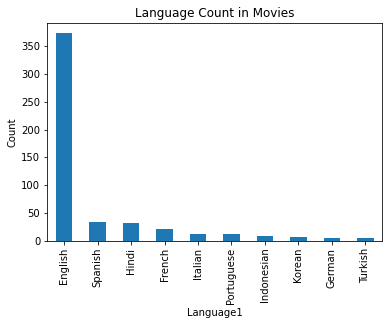

In [105]:
language_count_df.plot.bar()
plt.xlabel('Language1')
plt.ylabel('Count')
plt.title('Language Count in Movies')

There are a total of 10 languages in the new dataframe as we only used the languages that has 5 and more movies. We can see that **English** is the most frequently used Language in the dataframe.

Next, we move on to finding out the frequency count of the genres.

In [106]:
genre_count_df = eda_df['Genre'].value_counts()
genre_count_df

Documentary                 154
Comedy                      112
Drama                       111
Thriller                     49
Horror                        9
Biopic                        9
Action                        9
Romance                       7
Aftershow/Interview           6
Concert Film                  6
Animation                     5
Musical                       5
Variety show                  4
Adventure                     4
Animation/Short               4
Science fiction/Thriller      4
Family                        4
Science fiction               4
Name: Genre, dtype: int64

Text(0.5, 1.0, 'Genre Count')

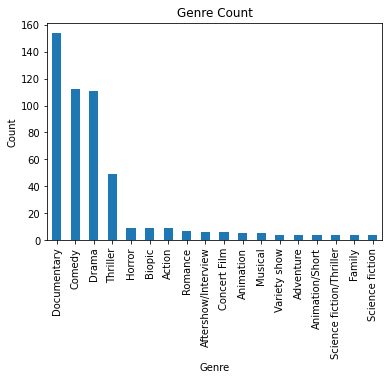

In [107]:
genre_count_df.plot.bar()
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Genre Count')

Out of the 12 genre categories, **Documentary** had the highest frequency count in all the movies.

### Question 2: Which Genre and Language has the highest and lowest average IMDB Score? 

For the second question, we want to know which Genre and Language has the highest and lowest average IMDB Score, to answer this question we need the variables:
- **`Language`**: Language used in the film.
- **`Genre`**: The genre type of the movie.
- **`IMDB Score`**: The IMDB Score rating of the movie.


To do this, we must first find out the median and mean of the Language and the IMDB Score.

#### Language and IMDB Score

In [108]:
median_df = eda_df.groupby("Language1").agg({"IMDB Score": ["median", "std"]})
median_df.sort_values(("IMDB Score", "median"), ascending=False)

IMDB Score          
               median       std
Language1                      
English          6.50  0.911409
Korean           6.45  1.389124
Spanish          6.40  1.056608
Portuguese       6.30  1.119009
Indonesian       6.20  0.912567
Hindi            6.20  1.034798
Turkish          6.10  1.163185
French           6.00  0.824046
German           5.80  0.589915
Italian          5.65  0.930746

In [109]:
mean_df = eda_df.groupby("Language1").agg({"IMDB Score":["mean","std"]})
mean_df.sort_values(("IMDB Score","mean"), ascending = False)

IMDB Score          
                 mean       std
Language1                      
English      6.424397  0.911409
Spanish      6.272727  1.056608
Portuguese   6.227273  1.119009
Hindi        6.062500  1.034798
Korean       5.916667  1.389124
Indonesian   5.844444  0.912567
French       5.770000  0.824046
Italian      5.758333  0.930746
Turkish      5.660000  1.163185
German       5.640000  0.589915

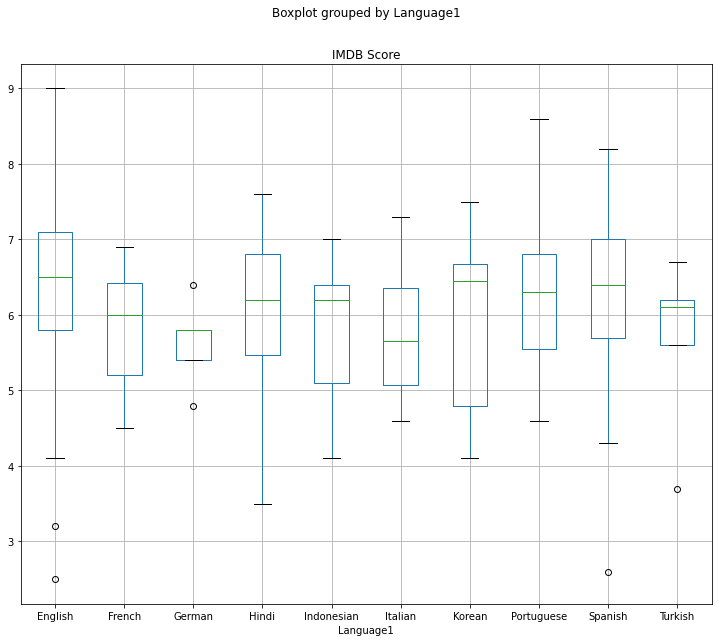

In [110]:
eda_df.boxplot("IMDB Score", by="Language1", figsize=(12,10))
plt.show()

The movies with **English** as its language has the the highest average IMDB score of 6.44 and the highest median score of  6.50 while the **German** movies scored the lowest average score of 5.64 and the movies in **Italian** scored the lowest median score of 5.65.

Next, we will proceed to doing the same procedure for getting the highest and lowest average scores for the Genre category.

#### GENRE AND IMDB SCORE


In [111]:
meangenscore_df = eda_df.groupby("Genre").agg({"IMDB Score":["mean","std"]})
meangenscore_df.sort_values(("IMDB Score","mean"), ascending = False)

IMDB Score          
                               mean       std
Genre                                        
Concert Film               7.633333  0.744759
Animation/Short            7.125000  0.556028
Documentary                6.947403  0.850313
Aftershow/Interview        6.750000  0.784219
Animation                  6.560000  0.920869
Romance                    6.442857  0.461364
Biopic                     6.400000  0.524404
Drama                      6.324324  0.732519
Adventure                  6.275000  0.873212
Science fiction/Thriller   6.000000  0.282843
Variety show               5.950000  1.047219
Musical                    5.760000  0.487852
Comedy                     5.759821  0.730353
Family                     5.750000  0.619139
Science fiction            5.725000  0.607591
Thriller                   5.724490  1.004268
Action                     5.711111  1.151569
Horror                     5.344444  0.736735

In [112]:
median_df = eda_df.groupby("Genre").agg({"IMDB Score": ["median", "std"]})
median_df.sort_values(("IMDB Score", "median"), ascending=False)

IMDB Score          
                             median       std
Genre                                        
Concert Film                   7.60  0.744759
Animation                      7.10  0.920869
Animation/Short                7.10  0.556028
Documentary                    7.05  0.850313
Aftershow/Interview            7.00  0.784219
Romance                        6.50  0.461364
Drama                          6.30  0.732519
Adventure                      6.30  0.873212
Biopic                         6.20  0.524404
Action                         6.10  1.151569
Thriller                       6.00  1.004268
Family                         5.90  0.619139
Science fiction/Thriller       5.90  0.282843
Comedy                         5.80  0.730353
Musical                        5.70  0.487852
Science fiction                5.55  0.607591
Variety show                   5.55  1.047219
Horror                         5.40  0.736735

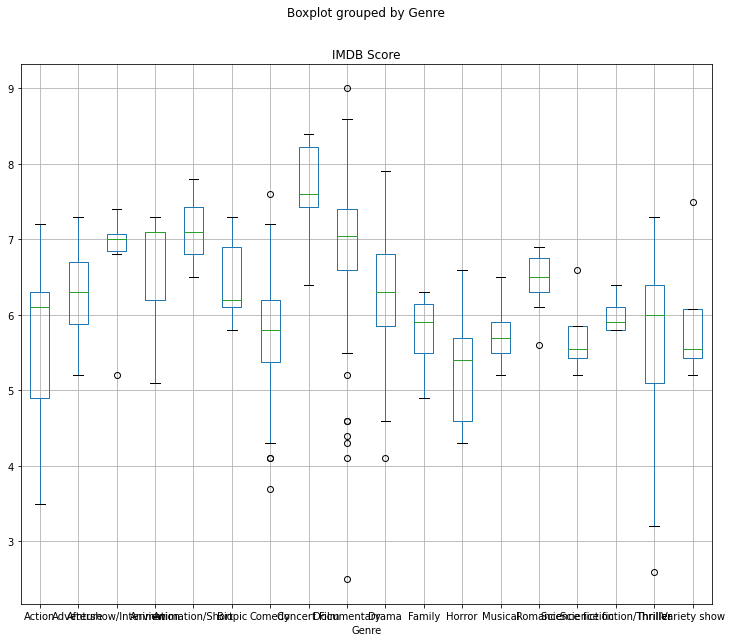

In [113]:
eda_df.boxplot("IMDB Score", by="Genre", figsize=(12,10))
plt.show()

The **Concert Film** genre had the highest average IMDB score rate of 7.63 and also the higest median score of 7.60. Meanwhile, the **Horror** genre scored the lowest for both mean and median with 5.34 and 5.44 IMDB Scores respectively.

### Question 3: Which Genre and Language has the longest and shortest average runtime length?

For the third question, we want to know which Genre and Language has the longest and shortest average runtime length, to answer this question we need the variables:
- **`Language`**: Language used in the film.
- **`Genre`**: The genre type of the movie.
- **`Runtime`**: The overall length of the film in minutes.

Like the second question, we must first find the mean runtime length for both the Genre and Language categories.

#### Language and Runtime

In [114]:
meanLangRun_df = eda_df.groupby("Language1").agg({"Runtime":["mean","std"]})
meanLangRun_df.sort_values(("Runtime","mean"), ascending = False)

Runtime           
                  mean        std
Language1                        
Hindi       116.593750  16.618799
Korean      115.833333  22.631100
Indonesian  103.777778  12.255384
Turkish     101.800000  10.592450
German       99.600000   9.396808
Italian      99.166667   7.720496
Spanish      94.666667  23.794257
French       92.700000  12.498842
English      91.402145  28.018795
Portuguese   90.545455  23.930581

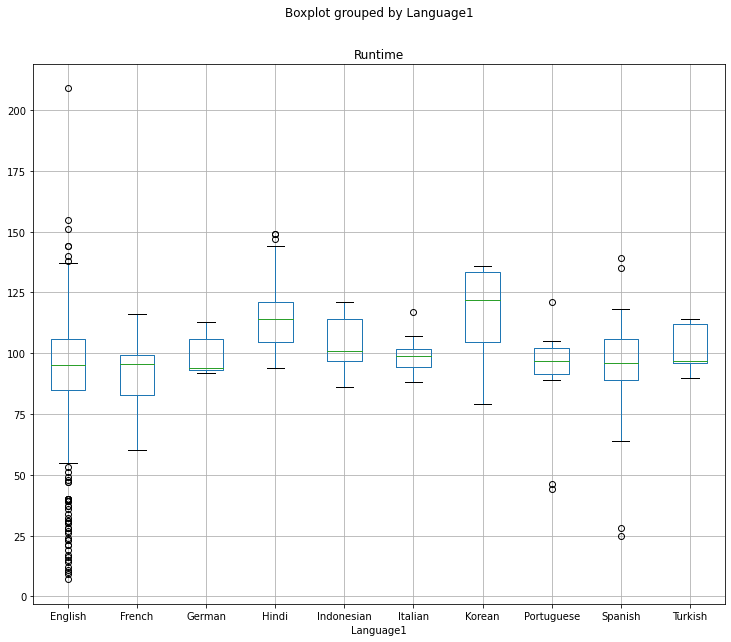

In [115]:
eda_df.boxplot("Runtime", by="Language1", figsize=(12,10))
plt.show()

The **Hindi** language have the highest runtime length count with an average of 116.59 minutes. Meanwhile the **Portugese** language has the shortest runtime length count with an average time of of 90.55 minutes.

#### GENRE AND RUNTIME

In [116]:
meangenrun_df = eda_df.groupby("Genre").agg({"Runtime":["mean","std"]})
meangenrun_df.sort_values(("Runtime","mean"), ascending = False)

Runtime           
                                mean        std
Genre                                          
Science fiction           110.750000  21.061418
Musical                   109.200000  15.610894
Thriller                  108.571429  16.410109
Action                    108.555556  22.847927
Biopic                    107.555556  13.258121
Drama                     107.342342  18.247538
Adventure                 103.000000  13.490738
Horror                    102.222222  18.680055
Family                    101.500000  15.588457
Romance                    98.857143  13.082158
Concert Film               98.666667  15.370968
Comedy                     98.598214  15.073071
Science fiction/Thriller   92.500000   4.203173
Documentary                79.915584  28.597032
Variety show               60.500000   8.736895
Animation                  57.200000  23.679105
Aftershow/Interview        23.666667  10.053192
Animation/Short            10.750000   3.500000

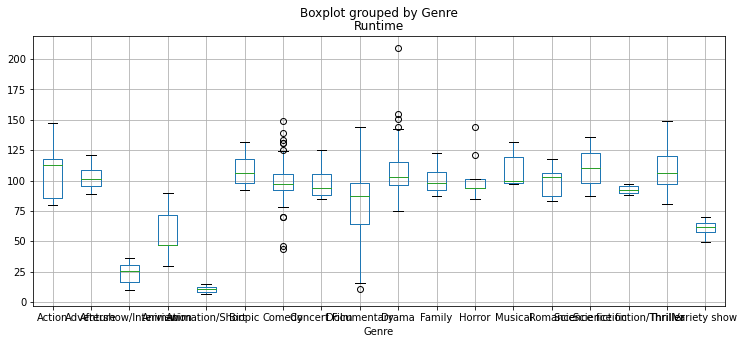

In [117]:
eda_df.boxplot("Runtime", by="Genre", figsize=(12,5))
plt.show()

The **Musical** genre had the highest average runtime length with 109.20 minutes and the **Documentary** genre had the lowest mean runtime length of 79.91 minutes. 

<h1> Statistical Inference </h1>

<h3>Research Questions </h3>

- <b>Is there association between the Languages of a Netflix original and IMDB Score?</b><br>

    - Language is our way of communicating to each other, and there are a lot of languages in the entire world. And of course there are also a lot of movies with different languages. Knowing if languages have effect on IMDB scores will know if there are certain languages that is appealing more to critics and the audience or not. <br><br>
    
- <b>Is there a difference in IMDB Scores between Netflix Originals released before before 2020?</b><br>
    
    - Before 2019 ended, there was a virus detected in Wuhan China, and later on will spread around the world and will be known as "COVID-19". In 2020, countries have closed its borders to prevent the virus from spreading and our society has collapsed ever since. With the strict protocols in preventing the virus from spreading, there were certain industries that had a hard time keeping up with society. One of those is the entertainment industry. In the year 2020, it became very hard to create movies and other entertainment shows as they have to decrease the number of people in a location, follow social distancing protocols, and changing of plans since some locations are closed to the public. Knowing the difficulties the entertainment industry have faced throughout this pandemic, did Netflix Originals became better or worse because of the pandemic?

<h2> Research Question 1: Is there a difference in IMDB Scores between Netflix Originals released before 2020 and Netflix Originals that were created 2020 onwards? </h2>

<b>H0</b> : There is no difference in the average IMDB Scores of Netflix originals released before 2020 and 2020 onwards<br>
<b>H1</b> : There is a difference in the average IMDB Scores of Netflix originals released before 2020 and 2020 onwards <br>

95% Confidence interval

Before starting, we have to check if IMDB Scores are normally distributed

<AxesSubplot:xlabel='IMDB Score', ylabel='Count'>

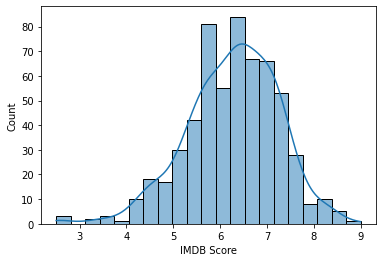

In [118]:
sns.histplot(data = netflix_df, x = "IMDB Score", kde = True)

As shown in the graph, The IMDB scores of Netflix Originals are normally distributed, having the majority somewhere between 6 - 7.

Before we start, we first create a copy of the dataset

In [119]:
temp_df = netflix_df.copy()
temp_df

,Title,Genre,Premiere,Runtime,IMDB Score,Language1,Language2,Language3
0,Enter the Anime,Documentary,2019-08-05,58,2.5,English,Japanese,None
1,Dark Forces,Thriller,2020-08-21,81,2.6,Spanish,None,None
2,The App,Science fiction/Drama,2019-12-26,79,2.6,Italian,None,None
3,The Open House,Thriller,2018-01-19,94,3.2,English,None,None
4,Kaali Khuhi,Mystery,2020-10-30,90,3.4,Hindi,None,None
...,...,...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,2018-12-31,125,8.4,English,None,None
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,2015-10-09,91,8.4,English,Ukranian,Russian
581,Springsteen on Broadway,One-man show,2018-12-16,153,8.5,English,None,None
582,Emicida: AmarElo - It's All For Yesterday,Documentary,2020-12-08,89,8.6,Portuguese,None,None


Two dataframes will be created, one for Netflix Originals that are premiered before 2020 and 2020 onwards. After creating the two dataframes, the mean and standard deviation of the IMDB scores will be computed using the agg function 

In [120]:
#b20_df - below 2020
#a20_df - above 2020

b20_df = temp_df[(temp_df['Premiere'] > '2013') & (temp_df['Premiere'] < '2020')]
a20_df = temp_df[temp_df['Premiere'] >= '2020']

a20_n = len(a20_df)
b20_n = len(b20_df)

a20_agg = a20_df.agg({"IMDB Score": ["mean", "std"]})
b20_agg = b20_df.agg({"IMDB Score": ["mean", "std"]})

print(b20_agg)
print(a20_agg)

      IMDB Score
mean    6.362727
std     0.954642
      IMDB Score
mean    6.153543
std     0.999905


After getting the mean and standard deviation of the two groups. It is time to compute for the standard error, degrees of freedom and t-statistic to be able to compute for the p-value

In [121]:
#compute for standard error
a20_se = a20_agg.loc["std"][0]/np.sqrt(a20_n)
b20_se = b20_agg.loc["std"][0]/np.sqrt(b20_n)

print('Standard Error of a20 : {:.4f}'.format(a20_se))
print('Standard Error of b20 : {:.4f}'.format(b20_se))

sed = np.sqrt((a20_se**2.0) + (b20_se**2.0))
print('SED : {:.4f}'.format(sed))

Standard Error of a20 : 0.0627
Standard Error of b20 : 0.0526
SED : 0.0818


In [122]:
#compute for t statistic
t_stat = (b20_agg.loc["mean"][0] - a20_agg.loc["mean"][0]) / sed

df = a20_n + b20_n - 2

print('t-statistics : {:.4f}'.format(t_stat))
print('degrees of freedom : {:.4f}'.format(df))

t-statistics : 2.5560
degrees of freedom : 582.0000


In [123]:
#now compute the p-value

#significance level
a = 0.05

#get critical value
critical_value = scipy.stats.t.ppf(1.0 - a, df)

#get 
researchQ1_p = (1 - scipy.stats.t.cdf(abs(t_stat), df)) * 2

print('p-value : {:4f}'.format(researchQ1_p))

p-value : 0.010842


<h2> Research Question 2: Is there association between the Available Languages of a Netflix original and IMDB Score? </h2>

<b>H0</b> : The IMDB Score range has no association with the Language availble of a Netflix Original <br>
<b>H1</b> : The IMDB score has association with the Language avaible of a Netflix Original <br>

95% Confidence interval

As seen in Research Question 1, the IMDB scores of Netflix Originals are normally distributed

<h3> Legend: </h3><br>
<b>High</b> : score >= 7.0 <br>
<b>low</b>  : score < 7.0 <br>

According to IMDB, the average score of all films is 7.0. Therefore, we will use 7.0 as our guideline to determine what makes a Netflix original have a good or bad IMDB Score.

Before starting, Data preprocessing must be done before computing the p-value. <br>

We first apply the scoring to the dataset by creating a copy. Then apply the "score" algorithm to determine what category is the IMDB Score of the Netflix Original

In [124]:
#apply high or low score
def score (score):
    if score >= 7.0:
        return "High"
    elif score < 7.0:
        return "Low"
    
netflix_copy = netflix_df.copy()
netflix_copy["IMDB Score Type"] = netflix_copy["IMDB Score"].apply(score)
netflix_copy

,Title,Genre,Premiere,Runtime,IMDB Score,Language1,Language2,Language3,IMDB Score Type
0,Enter the Anime,Documentary,2019-08-05,58,2.5,English,Japanese,None,Low
1,Dark Forces,Thriller,2020-08-21,81,2.6,Spanish,None,None,Low
2,The App,Science fiction/Drama,2019-12-26,79,2.6,Italian,None,None,Low
3,The Open House,Thriller,2018-01-19,94,3.2,English,None,None,Low
4,Kaali Khuhi,Mystery,2020-10-30,90,3.4,Hindi,None,None,Low
...,...,...,...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,2018-12-31,125,8.4,English,None,None,High
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,2015-10-09,91,8.4,English,Ukranian,Russian,High
581,Springsteen on Broadway,One-man show,2018-12-16,153,8.5,English,None,None,High
582,Emicida: AmarElo - It's All For Yesterday,Documentary,2020-12-08,89,8.6,Portuguese,None,None,High


We now group the Languages. We will only choose the languages that have at least a sample size of 5. But before we do that, we have to check the count of the Netflix Originals with Multilpe Languages.

In [125]:
count1 = netflix_copy['Language1'].value_counts()
count2 = netflix_copy['Language2'].value_counts()
count3 = netflix_copy['Language3'].value_counts()

In [126]:
#use this to check values of all counts
count1
#count2
#count3

English       419
Spanish        34
Hindi          33
French         20
Italian        14
Portuguese     12
Indonesian      9
Korean          6
Japanese        6
Turkish         5
German          5
Dutch           3
Marathi         3
Thai            3
Polish          3
Filipino        2
Georgian        1
Bengali         1
Malay           1
Swedish         1
Norwegian       1
Khmer           1
Tamil           1
Name: Language1, dtype: int64

In [127]:
count1 = count1.add(count2, fill_value = 0)
total = count1.add(count3, fill_value = 0)
total.sort_values(ascending = False)

English       422.0
Spanish        39.0
Hindi          35.0
French         21.0
Italian        14.0
Portuguese     12.0
Indonesian      9.0
Japanese        8.0
Korean          7.0
German          5.0
Turkish         5.0
Mandarin        3.0
Thai            3.0
Dutch           3.0
Polish          3.0
Marathi         3.0
Filipino        2.0
Russian         2.0
Swedish         2.0
Catalan         1.0
Bengali         1.0
Basque          1.0
Arabic          1.0
Ukranian        1.0
Khmer           1.0
Georgian        1.0
Malay           1.0
Norwegian       1.0
Taiwanese       1.0
Tamil           1.0
Akan            1.0
dtype: float64

Now that we got all the languages separated. We now check the count for each. After getting and checking the counts. We add the three

The Netflix Originals now must be grouped according to the available languages. Netflix Originals with more than two languages will be in 2 or more groups.

Seen in the table above, The languages, English, Hindi, Spanish, French, Italian, Portuguese, Indonesian, Japanese and Korean, German and Turkish are the only languages that have at least 5 netflix originals. <br>

We will now only take the Netflix Originals with languages that have the chosen languages.

In [128]:
def removeLanguage(l):
    arr = ['English', 'Hindi', 'Spanish', 'French', 'Italian', 'Portuguese', 'Indonesian','Japanese', 'Korean', 'German', "Turkish"]
    if l in arr:
        return l
    
    return None
    

temp_Language = ['English', 'Hindi', 'Spanish', 'French', 'Italian', 'Portuguese', 'Indonesian','Japanese', 'Korean', 'German', "Turkish"]
temp1_df = netflix_copy[netflix_copy['Language1'].isin(temp_Language)]
temp2_df = netflix_copy[netflix_copy['Language2'].isin(temp_Language)]
temp3_df = netflix_copy[netflix_copy['Language3'].isin(temp_Language)]


researchQ2_df = pd.concat([temp1_df, temp2_df, temp3_df]).drop_duplicates()

#remove languages not in chosen languages.
researchQ2_df['Language1'] = researchQ2_df['Language1'].apply(removeLanguage)
researchQ2_df['Language2'] = researchQ2_df['Language2'].apply(removeLanguage)
researchQ2_df['Language3'] = researchQ2_df['Language3'].apply(removeLanguage)
researchQ2_df

,Title,Genre,Premiere,Runtime,IMDB Score,Language1,Language2,Language3,IMDB Score Type
0,Enter the Anime,Documentary,2019-08-05,58,2.5,English,Japanese,None,Low
1,Dark Forces,Thriller,2020-08-21,81,2.6,Spanish,None,None,Low
2,The App,Science fiction/Drama,2019-12-26,79,2.6,Italian,None,None,Low
3,The Open House,Thriller,2018-01-19,94,3.2,English,None,None,Low
4,Kaali Khuhi,Mystery,2020-10-30,90,3.4,Hindi,None,None,Low
...,...,...,...,...,...,...,...,...,...
581,Springsteen on Broadway,One-man show,2018-12-16,153,8.5,English,None,None,High
582,Emicida: AmarElo - It's All For Yesterday,Documentary,2020-12-08,89,8.6,Portuguese,None,None,High
583,David Attenborough: A Life on Our Planet,Documentary,2020-10-04,83,9.0,English,None,None,High
375,Hope Frozen: A Quest to Live Twice,Documentary,2020-09-15,80,6.7,None,English,None,Low


Here is a table to see how many Netflix Originals have a high and low IMDB Score per Language.

In [129]:
temp1_table = pd.crosstab(researchQ2_df["Language1"], researchQ2_df["IMDB Score Type"])
temp2_table = pd.crosstab(researchQ2_df["Language2"], researchQ2_df["IMDB Score Type"])
temp3_table = pd.crosstab(researchQ2_df["Language3"], researchQ2_df["IMDB Score Type"])

vals = ["Language", "High", "Low"]
vals1 = ["Language", "High"]

temp1_table = temp1_table.reset_index().set_index('Language1', drop = False)
temp2_table = temp2_table.reset_index().set_index('Language2', drop = False)
temp3_table = temp3_table.reset_index().set_index('Language3', drop = False)

temp1_table.columns = vals
temp2_table.columns = vals
temp3_table.columns = vals1

researchQ2_table =  pd.concat([temp1_table, temp2_table, temp3_table])
researchQ2_table = researchQ2_table.groupby("Language", sort = False).sum()
researchQ2_table

,High,Low
Language,,
English,128,294.0
French,1,20.0
German,0,5.0
Hindi,7,28.0
Indonesian,1,8.0
Italian,2,12.0
Japanese,0,8.0
Korean,2,5.0
Portuguese,2,10.0


After processing all the data that we need, it is now time to solve for the p-value. The Test used to answer this research question is <b> Chi-Square test </b>.

Also after checking dataset, all of the observations are independent, and the groups have a sample size of atleast 5.

In [130]:
researchQ2_chi = scipy.stats.chi2_contingency(researchQ2_table, correction = True)
print('p-value : {:.4f}'.format(researchQ2_chi[1]))

p-value : 0.0506


# Insights and Conclusions
<p> In summary, we conducted the hypothesis testing as seen above to obtain the data for the research question. The testing of hypotheses or P-value method involves determining likely" or "unlikely" by determining the probability — assuming the null hypothesis were true — of observing a more extreme test statistic in the direction of the alternative hypothesis than the one observed. If the P-value is small, say less than (or equal to) the alpha level, then it is "unlikely." And, if the P-value is large, or more than the alpha level, then it is "likely."

### For Research Question 1: Is there a difference in IMDB Scores between Netflix Originals released before 2020 and Netflix Originals that were created 2020 onwards?

With the p-value of 0.010842 and the confidence interval of 95%, tells us that there is **sufficient evidence** to conclude that there is a difference in the average IMDB Scores of Netflix originals released before 2020 and 2020 onwards.<br>

To provide further support for our conclusion, a graph will visualize the average IMDB scores of the Netflix Originals throughout the years


<AxesSubplot:xlabel='premiere_year'>

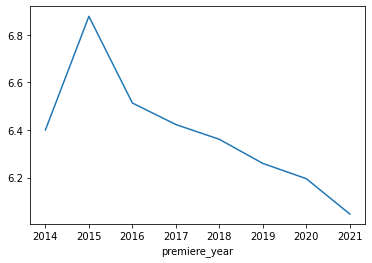

In [131]:
con1_df = temp_df.copy()
con1_df['premiere_year'] = pd.DatetimeIndex(con1_df['Premiere']).year
graph = con1_df.groupby('premiere_year')['IMDB Score'].mean()
graph.plot()

Several factors could have affected the IMDB scores of Netflix Originals. These factors include budget, timing and etc. But a big factor that could have affected these other factors is the pandemic. The pandemic could have cost some delays and changes in creating the Netflix Original. Examples of problems producers could have faced is the lack of people to work on the project, lack of budget, restricted location and etc. Another factor that could have affected IMDB scores is standards. As places such as cinemas are now closed down due to the pandemic, services such as Netflix, Disney + and more provide a way to watch movies and series without ever the need of going outside. This provided many to watch movies as many as they want for a price. Thus, people might have higher standards when it comes to Movies, Series and Documentaries.

### For Research Question 2: Is there association between the Available Languages of a Netflix original and IMDB Score? </h2>

With the calculated p-value of 0.0506 and the confidence interval of 95%, we can conclude from this question that there is **insufficient evidence** to infer that the IMDB Score range has no association with the Language availble of a Netflix Original. 


Language is one of the factors that could affect IMDB Score of movies and series. However, it is not the case for Netflix Originals. Netflix provides a lot of movies and series for people to watch. And these movies and series are not only restricted to western creations. Additionally, subtitles are there to help those who don't understand the main language the characters in the Movie/Series speak. With that, there is no other restriction for audiences to watch Netflix Originals.